<a href="https://colab.research.google.com/github/AlejandroGutie/G04-ME04-Avance-Monografia/blob/main/ME04_Desnutrici%C3%B3n_e_inseguridad_alimentaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Especialización en Analítica y Ciencia de Datos
### Monografía
### Gestión de datos

## _Clasificación de la desnutrición e inseguridad alimentaria en población infantil de los hogares del departamento de Antioquia, Colombia: un enfoque utilizando aprendizaje automático._

**Autores**\
Huberth Rolando Hincapié Arango\
Yeisson Alejandro Gutiérrez Cano

# Herramientas

## Librerías

In [3]:
# Datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

# Matemáticas y estadísticas
# ==============================================================================
import math
from collections import Counter

# Exportar datos
# ==============================================================================
from google.colab import files



# Procesamiento de datos

## Importación de datos

In [4]:
!gdown '12AMhKRv6LOYgSduVF_OHAncPcYQLosdW' -O /tmp/BDIndicadores.csv

Downloading...
From: https://drive.google.com/uc?id=12AMhKRv6LOYgSduVF_OHAncPcYQLosdW
To: /tmp/BDIndicadores.csv
100% 43.1M/43.1M [00:00<00:00, 68.1MB/s]


In [5]:
baseCompleta = pd.read_csv('/tmp/BDIndicadores.csv', encoding='ISO-8859-1', sep=';')
col_names = baseCompleta.columns.tolist()

# se podrían requerir los campos de SUBREGION para agregar info: 'Código subregión', 'Subregión',
dataset = baseCompleta[[ 'Código entidad', 'Entidad', 'Año', 'Indicador', 'Valor']]

<ipython-input-5-32d5e19e3724>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  baseCompleta = pd.read_csv('/tmp/BDIndicadores.csv', encoding='ISO-8859-1', sep=';')


In [6]:
print(col_names)

['Desagregación', 'Código subregión', 'Subregión', 'Código entidad', 'Entidad', 'Pilar', 'Número ODS', 'Nombre ODS', 'Número meta', 'Nombre meta', 'Número indicador', 'Indicador', 'Valor', 'Numerador', 'Denominador', 'Año', 'Fuente', 'Unidad de medida']


In [7]:
# Visualizar Base completa
baseCompleta.count()

Desagregación       135386
Código subregión    135386
Subregión           135386
Código entidad      135386
Entidad             135386
Pilar               135386
Número ODS          135386
Nombre ODS          135386
Número meta         135386
Nombre meta         135386
Número indicador    135386
Indicador           135386
Valor               135231
Numerador           135211
Denominador         133749
Año                 135386
Fuente              135386
Unidad de medida    135386
dtype: int64

In [8]:
# Visualizar dataset seleccionado
dataset

,Código entidad,Entidad,Año,Indicador,Valor
0,5674,San Vicente Ferrer,2019,Incidencia de la pobreza monetaria extrema,17.961425
1,5004,Abriaquí,2019,Incidencia de la pobreza monetaria extrema,11.345543
2,5591,Puerto Triunfo,2019,Incidencia de la pobreza monetaria extrema,5.830037
3,5792,Tarso,2019,Incidencia de la pobreza monetaria extrema,5.754092
4,5138,Cañasgordas,2019,Incidencia de la pobreza monetaria extrema,18.005586
...,...,...,...,...,...
135381,5138,Cañasgordas,2013,Penetración de internet fijo,2.819268
135382,5038,Angostura,2013,Penetración de internet fijo,1.757997
135383,5607,El Retiro,2013,Penetración de internet fijo,16.332712
135384,5051,Arboletes,2013,Penetración de internet fijo,2.165878


In [9]:
dataset.describe()

,Código entidad,Año,Valor
count,135386.000000,135386.000000,135231.000000
mean,5415.745830,2016.340308,235.605429
std,279.712332,3.624304,5043.463902
min,5001.000000,2007.000000,-195.173828
25%,5147.000000,2013.000000,0.000000
50%,5376.000000,2017.000000,16.279070
75%,5659.000000,2019.000000,58.473736
max,5895.000000,2022.000000,420374.293800


In [10]:
# Visualizar dataset inicial
dataset.count()

Código entidad    135386
Entidad           135386
Año               135386
Indicador         135386
Valor             135231
dtype: int64

In [11]:
# Pivoteo de los datos
df_pivot = dataset.pivot_table(index = ['Código entidad', 'Entidad', 'Año'], columns = 'Indicador', values = 'Valor').reset_index()
# Eliminar la columna 'index'
#df_pivot.drop(columns=['index'], inplace=True)
df_pivot

Indicador,Código entidad,Entidad,Año,Brecha de ingreso mensual promedio entre hombres y mujeres,Brecha de pobreza extrema urbano-rural,Brecha entre cobertura neta urbano-rural en educación básica y media,Capacidad instalada de generación de energía eléctrica,Cobertura de establecimientos financieros,Cobertura de vacunación con BCG en nacidos vivos,Cobertura de viviendas con agua potable,...,Tasa de violencia de pareja,Tasa de víctimas (directas e indirectas) de homicidio o desaparición forzada registradas en el Registro Único de Víctimas,Valor agregado de la industria manufacturera,Valor de ingresos laborales como porcentaje del Producto Interno Bruto (PIB),Vehículos eléctricos e híbridos matriculados,Índice de Pobreza Multidimensional (IPM),Índice de bancarización,Índice de riesgo de la calidad del agua (IRCA),Índice de riesgo de la calidad del agua (IRCA) Rural,Índice de riesgo de la calidad del agua (IRCA) Urbano
0,5001,Medellín,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5001,Medellín,2010,NaN,NaN,-24.521204,7.03,3.746016,110.815615,NaN,...,NaN,32.760797,10193.737870,NaN,4.272340,NaN,84.223668,0.600000,3.100750,0.420000
2,5001,Medellín,2011,NaN,NaN,-29.127469,7.03,6.570680,116.438727,NaN,...,NaN,39.077518,11268.531860,NaN,3.939082,NaN,93.385783,0.600000,3.501125,0.530000
3,5001,Medellín,2012,NaN,NaN,-38.959540,7.03,11.244419,115.130513,NaN,...,17.788743,24.233607,11131.966200,NaN,3.692916,NaN,94.080123,0.600000,0.600000,0.400000
4,5001,Medellín,2013,19.381305,1.658296,-38.277198,7.03,13.800588,106.594602,98.227862,...,76.033269,14.777441,11970.134940,NaN,3.469120,NaN,100.029149,0.600000,3.600000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,5895,Zaragoza,2018,NaN,NaN,16.046090,0.00,25.616173,36.210526,31.154890,...,60.578525,68.962720,19.566562,28.884945,0.000000,NaN,8.190252,41.820497,90.700000,15.900000
1749,5895,Zaragoza,2019,26.316477,1.219498,13.473454,0.00,35.002693,34.375000,26.433606,...,89.020772,83.300278,18.942080,29.321239,0.000000,36.345757,7.599623,42.644944,90.721475,16.335120
1750,5895,Zaragoza,2020,NaN,NaN,28.803033,0.00,81.290067,37.701149,35.906572,...,176.159718,51.340784,12.833172,30.552785,0.000000,NaN,8.135616,43.470102,90.721475,17.588626
1751,5895,Zaragoza,2021,-3.026480,1.095764,22.492464,0.00,108.504970,43.230404,0.000000,...,159.559037,19.592476,14.846039,NaN,0.000000,30.949200,7.114547,47.193502,92.175355,24.700000


In [12]:
df_pivot.describe()

Indicador,Código entidad,Año,Brecha de ingreso mensual promedio entre hombres y mujeres,Brecha de pobreza extrema urbano-rural,Brecha entre cobertura neta urbano-rural en educación básica y media,Capacidad instalada de generación de energía eléctrica,Cobertura de establecimientos financieros,Cobertura de vacunación con BCG en nacidos vivos,Cobertura de viviendas con agua potable,Cobertura de viviendas con agua potable (rural),...,Tasa de violencia de pareja,Tasa de víctimas (directas e indirectas) de homicidio o desaparición forzada registradas en el Registro Único de Víctimas,Valor agregado de la industria manufacturera,Valor de ingresos laborales como porcentaje del Producto Interno Bruto (PIB),Vehículos eléctricos e híbridos matriculados,Índice de Pobreza Multidimensional (IPM),Índice de bancarización,Índice de riesgo de la calidad del agua (IRCA),Índice de riesgo de la calidad del agua (IRCA) Rural,Índice de riesgo de la calidad del agua (IRCA) Urbano
count,1753.000000,1753.000000,497.000000,497.000000,1625.000000,1625.000000,1625.000000,1625.000000,1125.000000,1125.000000,...,1375.000000,1625.000000,1625.000000,500.000000,1625.000000,372.000000,1625.000000,1500.000000,1475.000000,1488.000000
mean,5416.185967,2015.363377,9.625440,1.631606,35.824398,39.768398,33.179910,52.428473,48.562717,13.419775,...,132.129217,39.035616,218.530680,33.015559,31.800014,18.957543,32.984906,22.737698,56.168577,4.718328
std,279.771073,4.286642,22.760642,2.854714,51.806436,168.592471,34.788462,58.710376,25.455504,21.987530,...,124.085756,103.425452,1076.632002,4.355538,130.759172,10.771114,34.489036,18.827139,31.062479,13.810602
min,5001.000000,2007.000000,-155.116244,0.000000,-195.173828,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.083089,18.877363,0.000000,1.264837,0.000000,0.000000,0.000000,0.000000
25%,5147.000000,2012.000000,2.248253,0.408716,8.895973,0.000000,8.841733,20.952381,33.039389,0.000000,...,45.320646,0.000000,7.892571,30.609675,0.000000,10.960123,10.297801,8.975000,32.805749,0.000000
50%,5376.000000,2016.000000,12.597277,1.064066,33.019733,0.000000,21.685943,36.231884,48.419261,1.209329,...,100.082677,0.000000,18.568569,32.948138,0.000000,16.654328,19.712033,18.900000,56.181541,0.880000
75%,5659.000000,2019.000000,22.598975,1.746349,58.407160,0.900000,45.474549,66.086957,64.761162,17.831814,...,188.042554,33.352789,47.696393,35.651828,0.000000,25.045718,45.336491,32.914224,85.202500,2.940000
max,5895.000000,2022.000000,64.527276,43.827010,418.117170,1466.900000,299.227799,597.727273,99.860009,99.400000,...,1256.106071,1453.957997,12209.622490,52.332404,2344.166223,56.413569,255.521760,100.000000,100.000000,100.000000


In [13]:
col_names = df_pivot.columns.tolist()
i = 0
#crear el diccionario
dictVars = {}
for c in col_names:
    if c == 'Incidencia de desnutrición aguda en población menor de 5 años':
        df_pivot.rename(columns = {c: 'O1'}, inplace = True)
        dictVars.update({'O1': c})
    elif c == 'Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)':
        df_pivot.rename(columns = {c: 'O2'}, inplace = True)
        dictVars.update({'O2': c})
    elif c not in {'Código entidad', 'Entidad', 'Año'}:
        df_pivot.rename(columns = {c: 'V' + str(i)}, inplace = True)
        dictVars.update({'V' + str(i): c})
        i+=1
    elif c in {'Código entidad'}:
        df_pivot.rename(columns = {c: 'CodDane'}, inplace = True)
    elif c in {'Entidad'}:
        df_pivot.rename(columns = {c: 'Mpio'}, inplace = True)

#reordenar las columnas del dataframe: [AtributosDeIdentification]+[Año]+[96_Vars]+[Salidas]
# Lista con el nuevo orden de las columnas

#separar los conjuntos de variables
vIdentificacion = ['CodDane', 'Mpio']
vPrediccion =  [f'V{i}' for i in range(96)]
vSalida = ['O1', 'O2']

#new_columns_order = ['CodDane', 'Mpio', 'Año'] + [f'V{i}' for i in range(96)] + ['O1', 'O2']
new_columns_order = vIdentificacion + ['Año'] + vPrediccion + vSalida
# Reordenar las columnas del DataFrame
df_pivot = df_pivot[new_columns_order]

col_names = df_pivot.columns.tolist()
print(col_names)

['CodDane', 'Mpio', 'Año', 'V0', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'O1', 'O2']


In [14]:
df_pivot.describe()

Indicador,CodDane,Año,V0,V1,V2,V3,V4,V5,V6,V7,...,V88,V89,V90,V91,V92,V93,V94,V95,O1,O2
count,1753.000000,1753.000000,497.000000,497.000000,1625.000000,1625.000000,1625.000000,1625.000000,1125.000000,1125.000000,...,1625.000000,500.000000,1625.000000,372.000000,1625.000000,1500.000000,1475.000000,1488.000000,750.000000,500.000000
mean,5416.185967,2015.363377,9.625440,1.631606,35.824398,39.768398,33.179910,52.428473,48.562717,13.419775,...,218.530680,33.015559,31.800014,18.957543,32.984906,22.737698,56.168577,4.718328,227.491591,26.651671
std,279.771073,4.286642,22.760642,2.854714,51.806436,168.592471,34.788462,58.710376,25.455504,21.987530,...,1076.632002,4.355538,130.759172,10.771114,34.489036,18.827139,31.062479,13.810602,295.224568,13.882069
min,5001.000000,2007.000000,-155.116244,0.000000,-195.173828,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.083089,18.877363,0.000000,1.264837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5147.000000,2012.000000,2.248253,0.408716,8.895973,0.000000,8.841733,20.952381,33.039389,0.000000,...,7.892571,30.609675,0.000000,10.960123,10.297801,8.975000,32.805749,0.000000,0.000000,17.242105
50%,5376.000000,2016.000000,12.597277,1.064066,33.019733,0.000000,21.685943,36.231884,48.419261,1.209329,...,18.568569,32.948138,0.000000,16.654328,19.712033,18.900000,56.181541,0.880000,144.225855,25.082549
75%,5659.000000,2019.000000,22.598975,1.746349,58.407160,0.900000,45.474549,66.086957,64.761162,17.831814,...,47.696393,35.651828,0.000000,25.045718,45.336491,32.914224,85.202500,2.940000,323.681217,33.800872
max,5895.000000,2022.000000,64.527276,43.827010,418.117170,1466.900000,299.227799,597.727273,99.860009,99.400000,...,12209.622490,52.332404,2344.166223,56.413569,255.521760,100.000000,100.000000,100.000000,3533.568905,76.648924


In [15]:
#print(f'número de columnas:{i}')
#print(dictVars['V1'])
#print(df_pivot.head(10))
#print(df_pivot.describe())
print(df_pivot.dtypes)

#ajustar los códigos dane
# Convertir la columna CodDane a cadena de texto y rellenar con ceros a la izquierda
df_pivot['CodDane'] = df_pivot['CodDane'].astype(str).str.zfill(5)

# Verificar los primeros elementos de la columna CodDane
print(df_pivot['CodDane'].head())

#verificar el df
print(df_pivot.describe().transform)

Indicador
CodDane      int64
Mpio        object
Año          int64
V0         float64
V1         float64
            ...   
V93        float64
V94        float64
V95        float64
O1         float64
O2         float64
Length: 101, dtype: object
0    05001
1    05001
2    05001
3    05001
4    05001
Name: CodDane, dtype: object
<bound method DataFrame.transform of Indicador          Año          V0          V1           V2           V3  \
count      1753.000000  497.000000  497.000000  1625.000000  1625.000000   
mean       2015.363377    9.625440    1.631606    35.824398    39.768398   
std           4.286642   22.760642    2.854714    51.806436   168.592471   
min        2007.000000 -155.116244    0.000000  -195.173828     0.000000   
25%        2012.000000    2.248253    0.408716     8.895973     0.000000   
50%        2016.000000   12.597277    1.064066    33.019733     0.000000   
75%        2019.000000   22.598975    1.746349    58.407160     0.900000   
max        2022.000000   

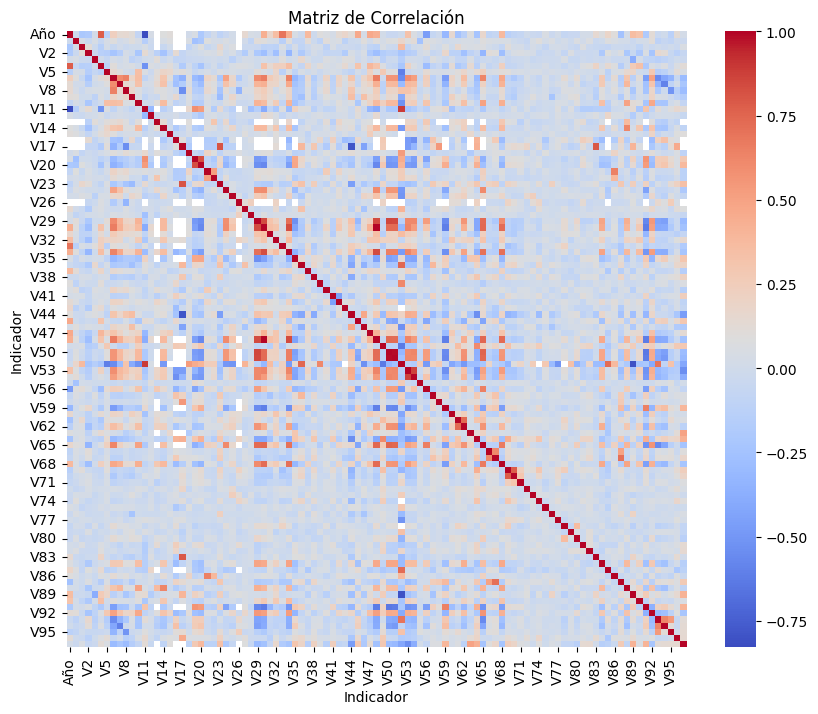

In [16]:
#*********************************************************************************
#Matriz de correlación ***********************************************************
#*********************************************************************************

df_numeric = df_pivot.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr(method='pearson')

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
#********************************************************************************
#*********************************************************************************

In [17]:
# Set the threshold
threshold = 0.3 ## segun criterio de Pearson, con las dos categorías de correlacion menor

# Create an empty list to store the pairs
high_correlation_pairs = []

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if np.abs(correlation_matrix.iloc[i, j]) > threshold and correlation_matrix.columns[i] != "Año" and correlation_matrix.columns[j]  != "Año"\
            and correlation_matrix.columns[i] != "O1" and correlation_matrix.columns[j]  != "O1" \
            and correlation_matrix.columns[i] != "O2" and correlation_matrix.columns[j]  != "O2":
            colname1, colname2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
            high_correlation_pairs.append((colname1, colname2))

j = 0
# Print the pairs with high correlation
for pair in high_correlation_pairs:
    print(j, pair)
    j = j + 1


0 ('V7', 'V6')
1 ('V8', 'V6')
2 ('V10', 'V5')
3 ('V10', 'V6')
4 ('V10', 'V7')
5 ('V11', 'V4')
6 ('V12', 'V11')
7 ('V14', 'V6')
8 ('V14', 'V7')
9 ('V14', 'V10')
10 ('V17', 'V6')
11 ('V17', 'V8')
12 ('V19', 'V6')
13 ('V19', 'V11')
14 ('V20', 'V6')
15 ('V20', 'V11')
16 ('V20', 'V19')
17 ('V22', 'V13')
18 ('V22', 'V21')
19 ('V23', 'V17')
20 ('V24', 'V6')
21 ('V24', 'V7')
22 ('V24', 'V20')
23 ('V26', 'V8')
24 ('V29', 'V6')
25 ('V29', 'V7')
26 ('V29', 'V10')
27 ('V29', 'V14')
28 ('V29', 'V19')
29 ('V29', 'V20')
30 ('V29', 'V24')
31 ('V30', 'V4')
32 ('V30', 'V6')
33 ('V30', 'V7')
34 ('V30', 'V10')
35 ('V30', 'V11')
36 ('V30', 'V14')
37 ('V30', 'V19')
38 ('V30', 'V20')
39 ('V30', 'V24')
40 ('V30', 'V25')
41 ('V30', 'V29')
42 ('V31', 'V29')
43 ('V31', 'V30')
44 ('V32', 'V30')
45 ('V34', 'V2')
46 ('V34', 'V4')
47 ('V34', 'V6')
48 ('V34', 'V7')
49 ('V34', 'V10')
50 ('V34', 'V14')
51 ('V34', 'V16')
52 ('V34', 'V19')
53 ('V34', 'V20')
54 ('V34', 'V29')
55 ('V34', 'V30')
56 ('V34', 'V32')
57 ('V35',

In [18]:
len(correlation_matrix.columns)


99

In [19]:
#df_numeric_correlation = df_numeric

# Assuming 'df' is your DataFrame and 'high_correlation_pairs' is your list of pairs

# Extract the first variable from each pair
variables_to_drop = set(pair[0] for pair in high_correlation_pairs)

# Drop these variables from the DataFrame
df_numeric_correlation = df_numeric.drop(columns=variables_to_drop)
df_numeric_correlation

Indicador,Año,V0,V1,V2,V3,V4,V5,V6,V9,V13,...,V66,V72,V73,V75,V76,V78,V81,V82,O1,O2
0,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,NaN,NaN,-24.521204,7.03,3.746016,110.815615,NaN,100.000000,NaN,...,11.588232,6.222721,13.909612,5.627902,0.000000,NaN,8.024755,110.976495,NaN,NaN
2,2011,NaN,NaN,-29.127469,7.03,6.570680,116.438727,NaN,100.000000,NaN,...,10.185815,6.189156,14.185365,5.511511,0.000000,NaN,9.910002,105.161475,NaN,NaN
3,2012,NaN,NaN,-38.959540,7.03,11.244419,115.130513,NaN,100.000000,NaN,...,7.476372,6.738996,12.719296,5.846413,0.044629,NaN,11.853622,104.691189,NaN,NaN
4,2013,19.381305,1.658296,-38.277198,7.03,13.800588,106.594602,98.227862,100.000000,NaN,...,5.736796,6.660876,13.498200,5.646306,0.000000,NaN,10.174241,100.062259,NaN,23.678642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,2018,NaN,NaN,16.046090,0.00,25.616173,36.210526,31.154890,99.862841,NaN,...,24.350649,8.113261,4.056631,4.056631,0.000000,0.0,22.256844,155.797908,192.307692,NaN
1749,2019,26.316477,1.219498,13.473454,0.00,35.002693,34.375000,26.433606,100.000000,NaN,...,15.844094,7.933360,3.966680,7.933360,0.000000,0.0,32.362460,183.387271,63.011972,66.459216
1750,2020,NaN,NaN,28.803033,0.00,81.290067,37.701149,35.906572,100.000000,0.0,...,0.000000,7.898582,0.000000,3.949291,0.000000,0.0,10.525208,126.302494,223.000956,NaN
1751,2021,-3.026480,1.095764,22.492464,0.00,108.504970,43.230404,0.000000,100.000000,NaN,...,0.000000,3.918495,3.918495,15.673981,0.000000,NaN,20.538098,92.421442,355.182435,38.859182


In [20]:
print(variables_to_drop)
print(f"cantidad de variables eliminadas: {len(variables_to_drop)}")

{'V44', 'V59', 'V26', 'V67', 'V79', 'V83', 'V58', 'V61', 'V86', 'V54', 'V14', 'V70', 'V30', 'V71', 'V57', 'V50', 'V53', 'V87', 'V10', 'V20', 'V47', 'V74', 'V31', 'V23', 'V64', 'V45', 'V48', 'V49', 'V19', 'V92', 'V60', 'V90', 'V8', 'V68', 'V46', 'V32', 'V52', 'V89', 'V80', 'V91', 'V62', 'V34', 'V29', 'V77', 'V7', 'V93', 'V88', 'V35', 'V94', 'V51', 'V56', 'V95', 'V84', 'V24', 'V42', 'V36', 'V65', 'V17', 'V69', 'V85', 'V22', 'V12', 'V11'}
cantidad de variables eliminadas: 63


In [21]:
dictVars

{'V0': 'Brecha de ingreso mensual promedio entre hombres y mujeres',
 'V1': 'Brecha de pobreza extrema urbano-rural',
 'V2': 'Brecha entre cobertura neta urbano-rural en educación básica y media',
 'V3': 'Capacidad instalada de generación de energía eléctrica',
 'V4': 'Cobertura de establecimientos financieros',
 'V5': 'Cobertura de vacunación con BCG en nacidos vivos',
 'V6': 'Cobertura de viviendas con agua potable',
 'V7': 'Cobertura de viviendas con agua potable (rural)',
 'V8': 'Cobertura de viviendas con agua potable (urbano)',
 'V9': 'Cobertura de viviendas con energía eléctrica',
 'V10': 'Cobertura en educación superior',
 'V11': 'Coeficiente de GINI',
 'V12': 'Crecimiento anual del Producto Interno Bruto (PIB) real per-cápita',
 'V13': 'Entidades territoriales con planes territoriales de cambio climático',
 'V14': 'Exportaciones totales como porcentaje del Producto Interno Bruto (PIB)',
 'V15': 'Hectáreas de pequeña y mediana propiedad rural, formalizadas',
 'V16': 'Hogares ur

In [22]:
# Columnas o variables eliminadas, por criterio de Pearson > 0.3
for col in variables_to_drop:
    if col[0] == 'V':
        print(f"{col}: {dictVars[col]}")

V44: Porcentaje de nacidos vivos con 4 o más controles prenatales
V59: Tasa de analfabetismo para la población de 15 años y más
V26: Miles de hectáreas de áreas marinas protegidas
V67: Tasa de homicidios (ocurrencia del hecho)
V79: Tasa de mortalidad prematura de las enfermedades crónicas de las vías respiratorias inferiores
V83: Tasa de personas afectadas a causa de eventos recurrentes
V58: Superficie regenerada de bosque natural
V61: Tasa de cobertura bruta en transición
V86: Tasa de violencia de pareja
V54: Promedio puntaje prueba Saber 11 - Matemáticas
V14: Exportaciones totales como porcentaje del Producto Interno Bruto (PIB)
V70: Tasa de mortalidad infantil
V30: Mujeres que habitan en hogares donde hay internet
V71: Tasa de mortalidad perinatal
V57: Superficie deforestada
V50: Porcentaje de población ocupada afiliada a Administradora de riesgos laborales
V53: Promedio puntaje prueba Saber 11 - Lectura crítica
V87: Tasa de víctimas (directas e indirectas) de homicidio o desaparici

In [23]:
len(variables_to_drop)

63

dictVars['V51'] 'Greys', 'Purples', 'Blues', 'Greens',


    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlGnBu', 'YlGn', 'YlOrBr', 'YlOrRd',
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
    'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
    'twilight', 'twilight_shifted', 'hsv',
    'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c',
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'

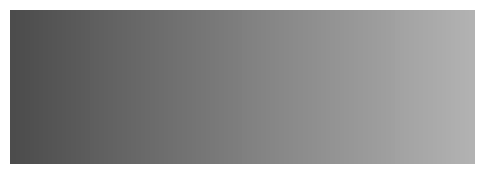

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Crear un colormap personalizado de grises que va de gris claro a gris oscuro
colors = [(0.3, 0.3, 0.3), (0.7, 0.7, 0.7)]  # Colores de inicio y fin en RGB
n_bins = 100  # Número de niveles de color
cmap_name = 'custom_greys'
custom_greys = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Mostrar la paleta de colores completa
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_greys)
ax.set_axis_off()
plt.show()


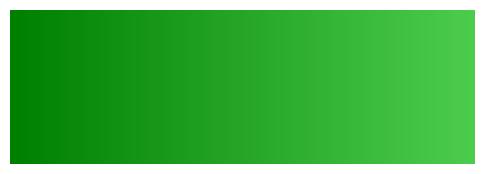

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Crear un colormap personalizado de tonos verdes que va de verde oscuro a verde claro menos brillante
colors = [(0.0, 0.5, 0.0), (0.3, 0.8, 0.3)]  # Colores de inicio y fin en RGB, invertidos
n_bins = 100  # Número de niveles de color
cmap_name = 'custom_greens'
custom_greens = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Mostrar la paleta de colores completa
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_greens)
ax.set_axis_off()
plt.show()



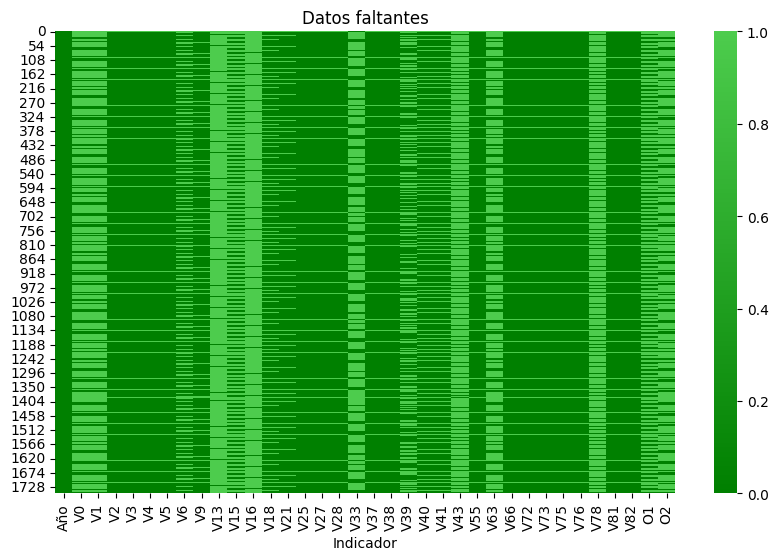

In [26]:
# Establecer el tamaño de la figura
# EL COLOR MAS CLARO SON LOS DATOS FALTANTES
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric_correlation.isnull(), cmap=custom_greens)
plt.title('Datos faltantes')
plt.show()

In [27]:
c = df_numeric_correlation.columns
d = c.drop(['Año', 'O1', 'O2'])
d[0]

'V0'

In [28]:
# Imputación con un modelo predictivo a partir de los datos vecinos
from sklearn.impute import KNNImputer
# Se construye el modelo para la imputación de la estatura
imputer = KNNImputer(n_neighbors = 15, weights = "distance")  # Definir el imputador KNN
df_Imputed = df_numeric_correlation

# Variables a imputar V0 a V95
#variables_a_imputar = ["V" + str(i) for i in range(0, 96) if i not in [52]] # se excluyen las vbles eliminadas
variables_a_imputar = d

# Iterar sobre las variables a imputar
for variable in variables_a_imputar:
    # Si la variable tiene valores faltantes
    if df_Imputed[variable].isnull().any():
        # Ajustar y transformar los datos
        df_Imputed[variable] = imputer.fit_transform(df_Imputed[[variable]]).ravel() ###*****pilas


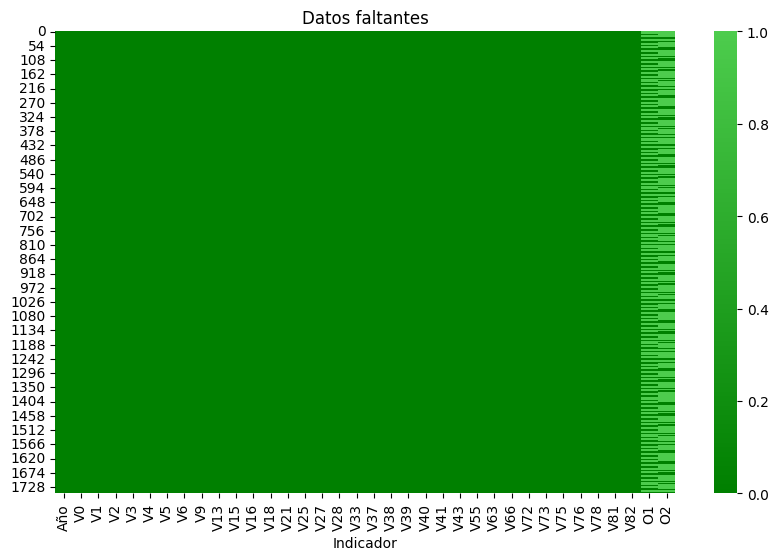

In [29]:
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 6))
#sns.heatmap(df_numeric_correlation.isnull(), cmap=custom_greens)
sns.heatmap(df_Imputed.isnull(), cmap=custom_greens)
plt.title('Datos faltantes')
plt.show()

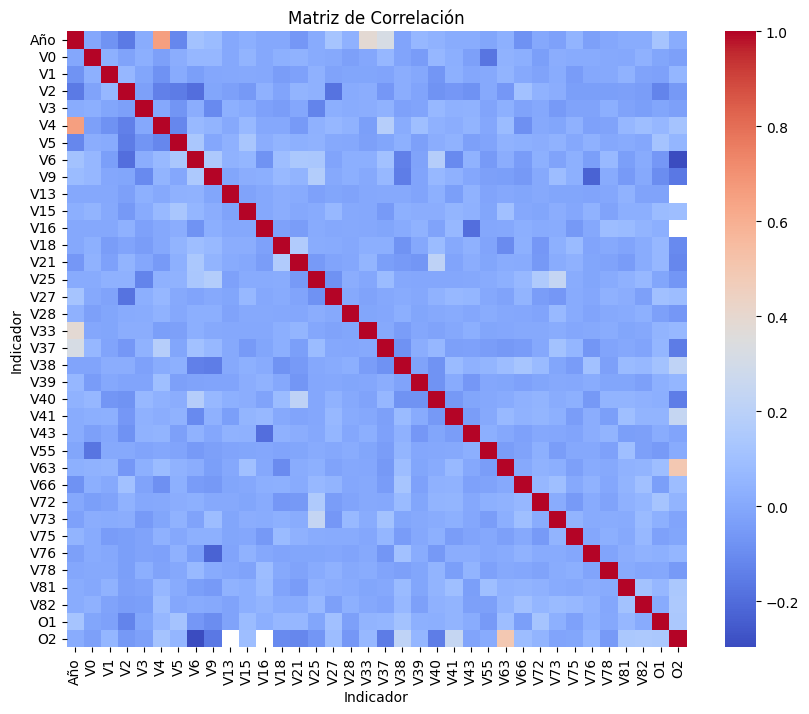

In [30]:
#*********************************************************************************
#Matriz de correlación Inmputada *************************************************
#*********************************************************************************


# Calcular la matriz de correlación
correlation_matrix2 = df_Imputed.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
#********************************************************************************
#*********************************************************************************

In [31]:
### HACER EL PROCESO DE LIMPIEZA UN PROCESO SEPARADO PARA CADA INDICADOR DE SALIDA ------ SEPARAR DropNAO1 y DropNAO2
### O1, 02
# Manejar los valores faltantes

# Quitar la columna 'O1' del DataFrame df_Imputed
df_ImputedDropNA_O2 = df_Imputed.drop(columns=['O1'])
# Eliminar las filas que contienen valores NaN
df_ImputedDropNA_O2 = df_ImputedDropNA_O2.dropna() #Limpiar en definitiva

# Quitar la columna 'O2' del DataFrame df_Imputed
df_ImputedDropNA_O1 = df_Imputed.drop(columns=['O2'])
# Eliminar las filas que contienen valores NaN
df_ImputedDropNA_O1 = df_ImputedDropNA_O1.dropna() #Limpiar en definitiva


df_ImputedDropNA_O1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Indicador,,,,,,,,
Año,750.0,2019.500000,1.708965,2017.000000,2018.000000,2019.500000,2021.000000,2022.000000
V0,750.0,9.353155,16.906977,-155.116244,9.625440,9.625440,11.348153,64.527276
V1,750.0,1.464859,1.258859,0.000000,1.001386,1.631606,1.631606,19.443506
V2,750.0,26.330750,49.518325,-194.156774,2.571613,25.168822,46.623866,323.683276
V3,750.0,42.008568,170.840632,0.000000,0.000000,0.000000,3.000000,1466.900000
V4,750.0,57.011496,37.322869,7.905833,27.979705,48.098901,75.376265,299.227799
V5,750.0,45.065873,71.258380,0.000000,14.395266,25.651782,37.988605,597.727273
V6,750.0,52.740005,21.723617,0.000000,41.127887,48.562717,66.933703,99.860009
V9,750.0,97.701963,6.764929,12.349184,97.152977,100.000000,100.000000,100.000000


In [32]:
df_ImputedDropNA_O2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Indicador,,,,,,,,
Año,500.0,2017.500000,2.961002,2013.000000,2016.000000,2018.000000,2019.500000,2021.000000
V0,500.0,9.625440,22.692120,-155.116244,2.286055,12.552559,22.595888,64.527276
V1,500.0,1.631606,2.846120,0.000000,0.410863,1.065083,1.742080,43.827010
V2,500.0,32.150462,51.044399,-184.739586,7.157899,30.301047,55.324672,372.916078
V3,500.0,40.439040,169.318694,0.000000,0.000000,0.000000,1.300000,1466.900000
V4,500.0,40.692726,34.602820,4.028360,15.551576,28.800111,54.995498,225.656120
V5,500.0,52.628383,63.268199,0.000000,19.089205,33.639116,66.492967,552.727273
V6,500.0,49.587530,25.308846,0.000000,33.498423,49.255824,67.206804,99.860009
V9,500.0,97.200297,7.616219,12.349184,97.808606,100.000000,100.000000,100.000000


In [33]:
# Columnas o variables incluidas para la construcción de los modelos
for col in df_ImputedDropNA_O2.columns:
    if col[0] == 'V':
        print(f"{col}: {dictVars[col]};")

V0: Brecha de ingreso mensual promedio entre hombres y mujeres;
V1: Brecha de pobreza extrema urbano-rural;
V2: Brecha entre cobertura neta urbano-rural en educación básica y media;
V3: Capacidad instalada de generación de energía eléctrica;
V4: Cobertura de establecimientos financieros;
V5: Cobertura de vacunación con BCG en nacidos vivos;
V6: Cobertura de viviendas con agua potable;
V9: Cobertura de viviendas con energía eléctrica;
V13: Entidades territoriales con planes territoriales de cambio climático;
V15: Hectáreas de pequeña y mediana propiedad rural, formalizadas;
V16: Hogares urbanos con déficit cualitativo de vivienda;
V18: Incidencia de intoxicaciones por sustancias químicas;
V21: Incidencia de violencia intrafamiliar (Atención x 2 fuentes);
V25: Intensidad energética;
V27: Miles de hectáreas de áreas protegidas;
V28: Mortalidad departamental causada por eventos recurrentes;
V33: Participación de mujeres en cargos de elección popular;
V37: Porcentaje de menores de 1 año con

In [34]:
#saber con cuáles años se está trabajando
print(df_numeric_correlation['Año'].unique())

[2007 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [35]:
#saber con cuáles años se está trabajando
print(df_ImputedDropNA_O1['Año'].unique())

[2017 2018 2019 2020 2021 2022]


In [36]:
#saber con cuáles años se está trabajando
print(df_ImputedDropNA_O2['Año'].unique())

[2013 2017 2019 2021]


In [37]:
#Binning por cuantiles
#import pandas as pd

# Supongamos que 'data' es un DataFrame y 'incidencia_desnutricion_aguda' es la columna con los datos continuos
# Supongamos que 'df_numeric_DropNA' es un DataFrame y 'O1' es la columna con los datos continuos
#saber con cuáles años se está trabajando
df_ImputedDropNA_O1['O1_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O1['O1'], q = 3, labels = ['Leve', 'Moderado', 'Alto'], retbins = True)

df_ImputedDropNA_O2['O2_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O2['O2'], q = 3, labels = ['Leve', 'Moderado', 'Alto'], retbins = True)



In [38]:
df_ImputedDropNA_O1.head(5)['O1_bins']

8         Alto
9         Alto
10        Alto
11    Moderado
12        Alto
Name: O1_bins, dtype: category
Categories (3, object): ['Leve' < 'Moderado' < 'Alto']

In [39]:
df_ImputedDropNA_O2.head(5)['O2_bins']

4     Moderado
8         Leve
10    Moderado
12        Alto
18    Moderado
Name: O2_bins, dtype: category
Categories (3, object): ['Leve' < 'Moderado' < 'Alto']

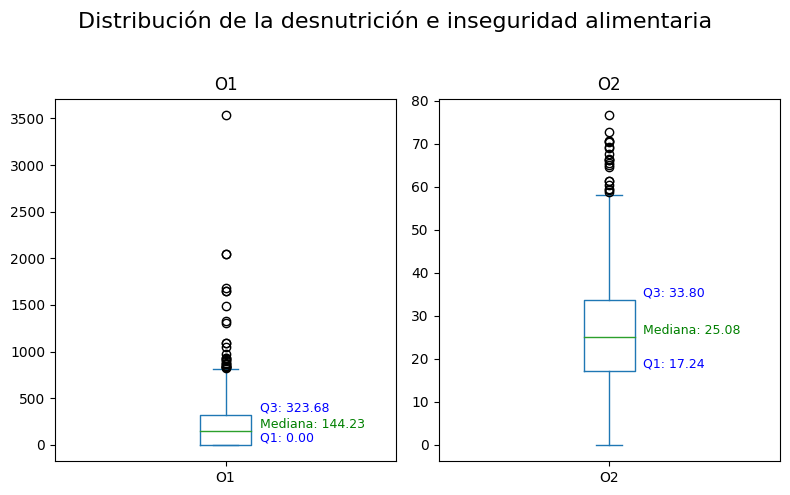

In [40]:
import matplotlib.pyplot as plt

# Crear una figura y dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Trazar el primer diagrama de caja en el primer subgráfico
boxplot1 = df_ImputedDropNA_O1['O1'].plot(kind='box', ax=axes[0], title='O1')

# Agregar etiquetas a los cuartiles y a la mediana en el primer diagrama de caja
medians = df_ImputedDropNA_O1['O1'].median()
q1 = df_ImputedDropNA_O1['O1'].quantile(0.25)
q3 = df_ImputedDropNA_O1['O1'].quantile(0.75)
axes[0].text(1.1, medians, f'Mediana: {medians:.2f}', verticalalignment='bottom', horizontalalignment='left', color='green', fontsize=9)
axes[0].text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)
axes[0].text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)

# Eliminar las líneas de la cuadrícula en el primer subgráfico
axes[0].grid(False)

# Trazar el segundo diagrama de caja en el segundo subgráfico
boxplot2 = df_ImputedDropNA_O2['O2'].plot(kind='box', ax=axes[1], title='O2')

# Agregar etiquetas a los cuartiles y a la mediana en el segundo diagrama de caja
medians2 = df_ImputedDropNA_O2['O2'].median()
q1_2 = df_ImputedDropNA_O2['O2'].quantile(0.25)
q3_2 = df_ImputedDropNA_O2['O2'].quantile(0.75)
axes[1].text(1.1, medians2, f'Mediana: {medians2:.2f}', verticalalignment='bottom', horizontalalignment='left', color='green', fontsize=9)
axes[1].text(1.1, q1_2, f'Q1: {q1_2:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)
axes[1].text(1.1, q3_2, f'Q3: {q3_2:.2f}', verticalalignment='bottom', horizontalalignment='left', color='blue', fontsize=9)

# Eliminar las líneas de la cuadrícula en el segundo subgráfico
axes[1].grid(False)

# Agregar título a toda la figura
fig.suptitle('Distribución de la desnutrición e inseguridad alimentaria', fontsize=16)
# Ajustar los espacios entre subgráficos
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar para no sobreponer con el título
# Mostrar la figura
plt.show()


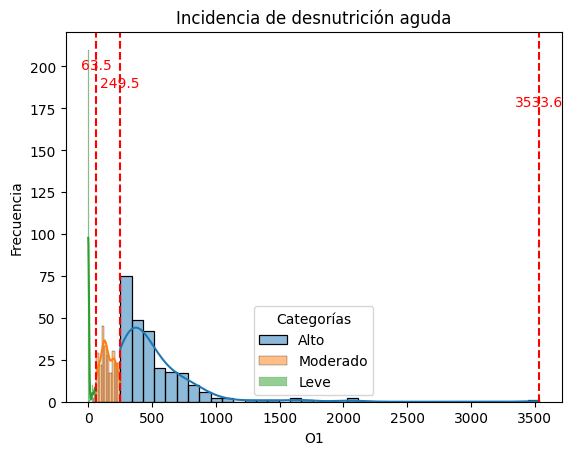

In [41]:
# Crear el histograma de la variable continua categorizada
df_ImputedDropNA_O1['O1_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O1['O1'], q=3, labels=['Leve', 'Moderado', 'Alto'], retbins=True)

# Crear el histograma de la variable continua categorizada
for label in df_ImputedDropNA_O1['O1_bins'].unique():
    subset = df_ImputedDropNA_O1[df_ImputedDropNA_O1['O1_bins'] == label]
    sns.histplot(subset['O1'], label=label, kde=True)

# Añadir líneas verticales para los puntos de corte (33.3%, 66.7% y 100%)
for i, bin_edge in enumerate(bin_edges[1:]):  # Ignorar el primer valor, que es el límite inferior
    plt.axvline(x=bin_edge, color='red', linestyle='--')
    # Ajustar la posición vertical de las etiquetas
    y_pos = plt.ylim()[1] * (0.9 if i == 0 else 0.85 if i == 1 else 0.8)
    plt.text(bin_edge, y_pos, f'{bin_edge:.1f}', color='red', ha='center')

#plt.xlabel('Incidencia de desnutrición aguda en población menor de 5 años (Continua)')
plt.ylabel('Frecuencia')
plt.title('Incidencia de desnutrición aguda')
plt.legend(title='Categorías')
# Eliminar las líneas de la cuadrícula
plt.grid(False)
plt.show()


In [42]:
df_ImputedDropNA_O1['O1'].describe()

count     750.000000
mean      227.491591
std       295.224568
min         0.000000
25%         0.000000
50%       144.225855
75%       323.681217
max      3533.568905
Name: O1, dtype: float64

In [43]:
df_ImputedDropNA_O2['O2'].describe()

count    500.000000
mean      26.651671
std       13.882069
min        0.000000
25%       17.242105
50%       25.082549
75%       33.800872
max       76.648924
Name: O2, dtype: float64

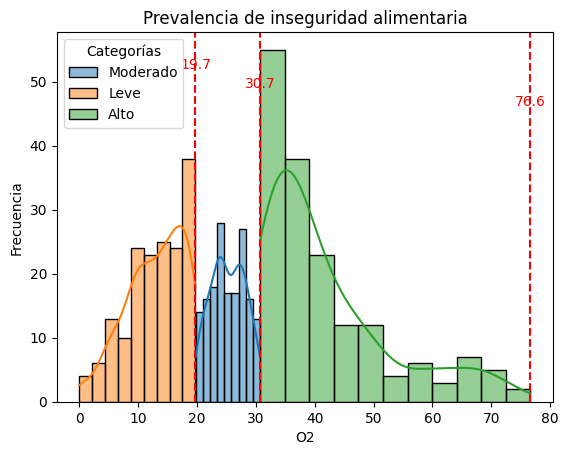

In [44]:
# Crear el histograma de la variable continua categorizada
df_ImputedDropNA_O2['O2_bins'], bin_edges = pd.qcut(df_ImputedDropNA_O2['O2'], q=3, labels=['Leve', 'Moderado', 'Alto'], retbins=True)

# Crear el histograma de la variable continua categorizada
for label in df_ImputedDropNA_O2['O2_bins'].unique():
    subset = df_ImputedDropNA_O2[df_ImputedDropNA_O2['O2_bins'] == label]
    sns.histplot(subset['O2'], label=label, kde=True)

# Añadir líneas verticales para los puntos de corte (33.3%, 66.7% y 100%)
for i, bin_edge in enumerate(bin_edges[1:]):  # Ignorar el primer valor, que es el límite inferior
    plt.axvline(x=bin_edge, color='red', linestyle='--')
    # Ajustar la posición vertical de las etiquetas
    y_pos = plt.ylim()[1] * (0.9 if i == 0 else 0.85 if i == 1 else 0.8)
    plt.text(bin_edge, y_pos, f'{bin_edge:.1f}', color='red', ha='center')

#plt.xlabel('Prevalencia de inseguridad alimentaria en el hogar (moderada o severa)')
plt.ylabel('Frecuencia')
plt.title('Prevalencia de inseguridad alimentaria')
plt.legend(title='Categorías')
# Eliminar las líneas de la cuadrícula
plt.grid(False)
plt.show()

# **Pycaret**: Librería de código abierto, que facilita la generación de poco código, con OOP en lenguaje Python; la cual permite automatizar los flujos de trabajo en aprendizaje automático.(https://pycaret.org/)

In [ ]:
!pip install pycaret[models]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 23.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
#data = get_data('iris')
dataO1 = df_ImputedDropNA_O1.drop(['O1', 'Año'], axis=1)
dataO2 = df_ImputedDropNA_O2.drop(['O2', 'Año'], axis=1)

In [ ]:
dataO1.head(5)

Indicador,V0,V1,V2,V3,V4,V5,V6,V9,V13,V15,...,V63,V66,V72,V73,V75,V76,V78,V81,V82,O1_bins
8,-0.231475,0.366505,-65.093212,7.03,23.714689,150.140786,99.824989,100.0,0.072,0.0,...,8.517124,4.984832,6.456974,11.698025,6.582760,0.0,3.426133,8.165476,111.652134,Alto
9,9.625440,1.631606,-71.665182,7.03,37.910586,140.330690,97.020284,100.0,0.072,0.0,...,11.146798,4.275262,7.416169,13.143100,7.622174,0.0,6.000000,9.398189,111.100016,Alto
10,9.354491,0.274955,-77.600649,8.03,36.612637,135.060635,98.461751,100.0,0.072,0.0,...,15.373152,4.259789,6.683994,12.200302,8.455655,0.0,6.200000,6.671592,113.986585,Alto
11,9.625440,1.631606,-92.202124,8.03,67.930976,125.643209,98.222383,100.0,1.000,0.0,...,11.146798,2.394301,5.635833,10.279442,7.779037,0.0,5.800000,10.807873,107.442969,Moderado
12,5.167586,0.324032,-99.791278,8.03,92.955999,120.803968,97.997850,100.0,0.072,0.0,...,17.494784,2.743391,6.904647,12.632365,8.316961,0.0,3.426133,10.026660,117.210879,Alto


In [ ]:
dataO2.head(5)

Indicador,V0,V1,V2,V3,V4,V5,V6,V9,V13,V15,...,V63,V66,V72,V73,V75,V76,V78,V81,V82,O2_bins
4,19.381305,1.658296,-38.277198,7.03,13.800588,106.594602,98.227862,100.000000,0.072,7.512041,...,12.778754,5.736796,6.660876,13.498200,5.646306,0.0,3.426133,10.174241,100.062259,Moderado
8,-0.231475,0.366505,-65.093212,7.03,23.714689,150.140786,99.824989,100.000000,0.072,0.000000,...,8.517124,4.984832,6.456974,11.698025,6.582760,0.0,3.426133,8.165476,111.652134,Leve
10,9.354491,0.274955,-77.600649,8.03,36.612637,135.060635,98.461751,100.000000,0.072,0.000000,...,15.373152,4.259789,6.683994,12.200302,8.455655,0.0,6.200000,6.671592,113.986585,Moderado
12,5.167586,0.324032,-99.791278,8.03,92.955999,120.803968,97.997850,100.000000,0.072,0.000000,...,17.494784,2.743391,6.904647,12.632365,8.316961,0.0,3.426133,10.026660,117.210879,Alto
18,20.502836,0.531500,71.721935,3.00,6.773691,61.732852,32.855514,98.842135,0.072,7.512041,...,7.834277,29.345593,9.449117,0.000000,4.724558,0.0,3.426133,10.091836,70.642850,Moderado


**Escalamiento**

In [ ]:
from sklearn.preprocessing import StandardScaler
Dx = dataO1.drop('O1_bins', axis=1)
Dy = dataO1['O1_bins']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar las características
X_scaled = scaler.fit_transform(Dx)

# Convertir X_scaled de nuevo a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=Dx.columns)

# Combinar las características escaladas con la columna objetivo
dataO1_scaled = pd.concat([X_scaled, Dy.reset_index(drop=True)], axis=1)
dataO1_scaled.head()



,V0,V1,V2,V3,V4,V5,V6,V9,V13,V15,...,V63,V66,V72,V73,V75,V76,V78,V81,V82,O1_bins
0,-0.567282,-0.873081,-1.847497,-0.204880,-0.892724,1.475546,2.168902,0.339925,0.000000,-0.139666,...,-0.546530,-0.213156,0.731397,-0.263152,-0.009501,-0.065755,-1.232199e-16,-0.257090,0.059075,Alto
1,0.016116,0.132548,-1.980304,-0.204880,-0.512116,1.337785,2.039708,0.339925,0.000000,-0.139666,...,0.039233,-0.267646,0.928925,-0.189374,0.123586,-0.065755,3.570810e-01,-0.183989,0.048226,Alto
2,0.000079,-0.945855,-2.100248,-0.199023,-0.546916,1.263779,2.106107,0.339925,0.000000,-0.139666,...,0.980658,-0.268834,0.778148,-0.237508,0.230305,-0.065755,3.848276e-01,-0.345679,0.104943,Alto
3,0.016116,0.132548,-2.395315,-0.199023,0.292763,1.131532,2.095081,0.339925,8.793937,-0.139666,...,0.039233,-0.412091,0.562299,-0.335577,0.143671,-0.065755,3.293343e-01,-0.100394,-0.023629,Moderado
4,-0.247730,-0.906843,-2.548677,-0.199023,0.963712,1.063575,2.084738,0.339925,0.000000,-0.139666,...,1.453255,-0.385284,0.823587,-0.215449,0.212547,-0.065755,-1.232199e-16,-0.146720,0.168295,Alto


In [ ]:

Dx = dataO2.drop('O2_bins', axis=1)
Dy = dataO2['O2_bins']

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar las características
X_scaled = scaler.fit_transform(Dx)

# Convertir X_scaled de nuevo a un DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=Dx.columns)

# Combinar las características escaladas con la columna objetivo
dataO2_scaled = pd.concat([X_scaled, Dy.reset_index(drop=True)], axis=1)
dataO2_scaled.head()

,V0,V1,V2,V3,V4,V5,V6,V9,V13,V15,...,V63,V66,V72,V73,V75,V76,V78,V81,V82,O2_bins
0,0.430354,0.009387,-1.381115,-0.197512,-0.777944,0.853830,1.923796,0.367966,0.0,0.019076,...,0.268621,-0.185126,0.668792,-0.234094,-0.070644,-0.101973,0.027614,-0.133295,-0.144473,Moderado
1,-0.434811,-0.444945,-1.906988,-0.197512,-0.491146,1.542798,1.986964,0.367966,0.0,-0.149347,...,-0.432846,-0.244419,0.632366,-0.321972,0.048022,-0.101973,0.027614,-0.254170,0.079917,Leve
2,-0.011952,-0.477144,-2.152264,-0.191600,-0.118030,1.304207,1.933046,0.367966,0.0,-0.149347,...,0.695661,-0.301590,0.672922,-0.297453,0.285350,-0.101973,0.612624,-0.344063,0.125114,Moderado
3,-0.196646,-0.459884,-2.587431,-0.191600,1.511889,1.078644,1.914698,0.367966,0.0,-0.149347,...,1.044883,-0.421160,0.712340,-0.276361,0.267775,-0.101973,0.027614,-0.142175,0.187539,Alto
4,0.479827,-0.386916,0.776013,-0.221337,-0.981221,0.144047,-0.661775,0.215787,0.0,0.019076,...,-0.545243,1.676465,1.166892,-0.893029,-0.187445,-0.101973,0.027614,-0.138254,-0.714058,Moderado


In [ ]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [ ]:
# init setup on exp
exp.setup(dataO1_scaled, target = 'O1_bins', session_id = 123)

,Description,Value
0,Session id,123
1,Target,O1_bins
2,Target type,Multiclass
3,Target mapping,"Alto: 0, Leve: 1, Moderado: 2"
4,Original data shape,"(750, 34)"
5,Transformed data shape,"(750, 34)"
6,Transformed train set shape,"(525, 34)"
7,Transformed test set shape,"(225, 34)"
8,Numeric features,33
9,Preprocess,True


In [ ]:
# Comparar modelos y seleccionar los 5 mejores
exp.compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5276,0.7068,0.5276,0.5320,0.5236,0.2912,0.2946,0.3670
catboost,CatBoost Classifier,0.5048,0.6917,0.5048,0.5114,0.5020,0.2567,0.2600,13.3330
rf,Random Forest Classifier,0.4988,0.6934,0.4988,0.4991,0.4935,0.2482,0.2509,0.2660
lightgbm,Light Gradient Boosting Machine,0.4969,0.6896,0.4969,0.4958,0.4927,0.2446,0.2468,0.4960
gbc,Gradient Boosting Classifier,0.4894,0.0000,0.4894,0.4905,0.4839,0.2340,0.2369,1.3010
ada,Ada Boost Classifier,0.4893,0.0000,0.4893,0.4948,0.4872,0.2341,0.2364,0.2440
xgboost,Extreme Gradient Boosting,0.4780,0.6846,0.4780,0.4783,0.4706,0.2167,0.2206,0.4730
knn,K Neighbors Classifier,0.4401,0.6267,0.4401,0.4439,0.4257,0.1593,0.1656,0.0390
nb,Naive Bayes,0.4324,0.6192,0.4324,0.4581,0.4014,0.1489,0.1641,0.0390
qda,Quadratic Discriminant Analysis,0.4155,0.0000,0.4155,0.4149,0.3885,0.1229,0.1290,0.0340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [ ]:
exp.setup(dataO2_scaled, target = 'O2_bins', session_id = 135)

,Description,Value
0,Session id,135
1,Target,O2_bins
2,Target type,Multiclass
3,Target mapping,"Alto: 0, Leve: 1, Moderado: 2"
4,Original data shape,"(500, 34)"
5,Transformed data shape,"(500, 34)"
6,Transformed train set shape,"(350, 34)"
7,Transformed test set shape,"(150, 34)"
8,Numeric features,33
9,Preprocess,True


In [ ]:
# Comparar modelos y seleccionar los 5 mejores
exp.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5914,0.7747,0.5914,0.6033,0.5873,0.3866,0.3935,0.1780
catboost,CatBoost Classifier,0.5886,0.7814,0.5886,0.6014,0.5868,0.3823,0.3879,12.5250
gbc,Gradient Boosting Classifier,0.5686,0.0000,0.5686,0.5814,0.5686,0.3522,0.3563,0.9370
xgboost,Extreme Gradient Boosting,0.5686,0.7576,0.5686,0.5809,0.5686,0.3524,0.3561,0.3090
rf,Random Forest Classifier,0.5657,0.7670,0.5657,0.5805,0.5621,0.3490,0.3555,0.2210
lightgbm,Light Gradient Boosting Machine,0.5657,0.7478,0.5657,0.5818,0.5650,0.3477,0.3529,0.2700
lr,Logistic Regression,0.5371,0.0000,0.5371,0.5422,0.5308,0.3048,0.3094,0.5830
lda,Linear Discriminant Analysis,0.5200,0.0000,0.5200,0.5307,0.5132,0.2789,0.2844,0.0370
svm,SVM - Linear Kernel,0.5114,0.0000,0.5114,0.5276,0.5017,0.2674,0.2763,0.0410
ridge,Ridge Classifier,0.5086,0.0000,0.5086,0.5141,0.4997,0.2616,0.2672,0.0320


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=135, verbose=0,
                     warm_start=False)

#**Desarrollo de modelos**
De acuerdo a lo anterior, analicemos más a fondo los modelos que califica como mejores

***Descision Tree Classifier***: Es un método no paramétrico de aprendizaje supervisado utilizado para clasificación y regresión.  La meta es crear un modelo que prediga el valor de una variable objetivo mediante el eprendizaje de regla de decisión simples, inferidas desde las características de los datos. (https://scikit-learn.org/1.4/modules/tree.html#tree)

In [ ]:
dataO1_scaled.head()

,V0,V1,V2,V3,V4,V5,V6,V9,V13,V15,...,V63,V66,V72,V73,V75,V76,V78,V81,V82,O1_bins
0,-0.567282,-0.873081,-1.847497,-0.204880,-0.892724,1.475546,2.168902,0.339925,0.000000,-0.139666,...,-0.546530,-0.213156,0.731397,-0.263152,-0.009501,-0.065755,-1.232199e-16,-0.257090,0.059075,Alto
1,0.016116,0.132548,-1.980304,-0.204880,-0.512116,1.337785,2.039708,0.339925,0.000000,-0.139666,...,0.039233,-0.267646,0.928925,-0.189374,0.123586,-0.065755,3.570810e-01,-0.183989,0.048226,Alto
2,0.000079,-0.945855,-2.100248,-0.199023,-0.546916,1.263779,2.106107,0.339925,0.000000,-0.139666,...,0.980658,-0.268834,0.778148,-0.237508,0.230305,-0.065755,3.848276e-01,-0.345679,0.104943,Alto
3,0.016116,0.132548,-2.395315,-0.199023,0.292763,1.131532,2.095081,0.339925,8.793937,-0.139666,...,0.039233,-0.412091,0.562299,-0.335577,0.143671,-0.065755,3.293343e-01,-0.100394,-0.023629,Moderado
4,-0.247730,-0.906843,-2.548677,-0.199023,0.963712,1.063575,2.084738,0.339925,0.000000,-0.139666,...,1.453255,-0.385284,0.823587,-0.215449,0.212547,-0.065755,-1.232199e-16,-0.146720,0.168295,Alto


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()

#Separar variables de entrada y de salida
X = dataO1_scaled.drop(['O1_bins'], axis=1)
y = le.fit_transform(dataO1_scaled['O1_bins'])
X.shape, y.shape

((750, 33), (750,))

In [ ]:
#split de datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=47)

In [ ]:
#configurar estimador
dt = DecisionTreeClassifier()

In [ ]:
#configurar Cross Validation
from sklearn.model_selection import GridSearchCV, KFold
Kfold = KFold(n_splits=10, shuffle=True, random_state=47)

In [ ]:
#configurar parametros
params = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30, 50, 100],
    'min_samples_split': [1, 2, 3],
    'criterion': ["gini", "entropy"]
}

In [ ]:
#configurar Grid Search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=Kfold,
                           n_jobs=1,
                           verbose=1,
                           scoring="accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=47, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              monotonic_cst=None,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11,
                                              12, 20, 30, 50, 100],
                         'min_samples_split': [1, 2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
dt_best = grid_search.best_estimator_
grid_search.best_params_, grid_search.best_score_

({'criterion': 'gini',
  'max_depth': 15,
  'min_samples_leaf': 2,
  'min_samples_split': 2},
 0.5010159651669086)

In [ ]:

from sklearn.model_selection import  StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Pipeline para preprocesar y entrenar el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar características
    ('dt', DecisionTreeClassifier())
])

# Configurar Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)

# Configurar parámetros de Grid Search
params = {
    'dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20],
    'dt__min_samples_leaf': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30, 50, 100],
    'dt__min_samples_split': [2, 3, 5, 10],
    'dt__criterion': ["gini", "entropy"]
}

# Configurar Grid Search
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=params,
                           cv=skf,
                           n_jobs=-1,  # Usar todos los núcleos disponibles
                           verbose=1,
                           scoring="accuracy")

# Entrenar Grid Search
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor score de validación cruzada:", grid_search.best_score_)

# Evaluar en el conjunto de prueba
y_pred = grid_search.best_estimator_.predict(X_test)
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Mejores parámetros encontrados: {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 9, 'dt__min_samples_split': 2}
Mejor score de validación cruzada: 0.4990476190476191
Accuracy en el conjunto de prueba: 0.4444444444444444


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from scipy.stats import randint

# Crear un pipeline para preprocesar y entrenar el modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalar características
    ('dt', DecisionTreeClassifier())
])

# Configurar Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)

# Configurar parámetros de Random Search
params = {
    'dt__max_depth': randint(1, 21),
    'dt__min_samples_leaf': randint(1, 101),
    'dt__min_samples_split': randint(2, 11),
    'dt__criterion': ["gini", "entropy"]
}

# Configurar Randomized Search
random_search = RandomizedSearchCV(estimator=pipeline,
                                   param_distributions=params,
                                   cv=skf,
                                   n_jobs=-1,  # Usar todos los núcleos disponibles
                                   verbose=1,
                                   scoring="accuracy",
                                   n_iter=100,  # Número de iteraciones de búsqueda aleatoria
                                   random_state=47)

# Separar el conjunto de entrenamiento y prueba (si no lo has hecho ya)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Entrenar Randomized Search
random_search.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados:", random_search.best_params_)
print("Mejor score de validación cruzada:", random_search.best_score_)

# Evaluar en el conjunto de prueba
y_pred = random_search.best_estimator_.predict(X_test)
print("Accuracy en el conjunto de prueba:", accuracy_score(y_test, y_pred))


**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Configurar Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=47)

# Configurar parámetros de Grid Search para GradientBoosting
params_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5, 6, 7, 10]
}

# Configurar Grid Search para GradientBoosting
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                              param_grid=params_gb,
                              cv=skf,
                              n_jobs=-1,  # Usar todos los núcleos disponibles
                              verbose=1,
                              scoring="accuracy")

# Entrenar Grid Search
grid_search_gb.fit(X_train, y_train)

# Resultados
print("Mejores parámetros encontrados para GradientBoosting:", grid_search_gb.best_params_)
print("Mejor score de validación cruzada para GradientBoosting:", grid_search_gb.best_score_)

# Evaluar en el conjunto de prueba
y_pred_gb = grid_search_gb.best_estimator_.predict(X_test)
print("Accuracy en el conjunto de prueba para GradientBoosting:", accuracy_score(y_test, y_pred_gb))


**Extra Tree Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Inicializar el clasificador Extra Trees
etc = ExtraTreesClassifier(random_state=123)

# Configurar los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [False, True]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=etc, param_grid=param_grid,
                           cv=10, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión en conjunto de prueba: {accuracy:.2f}')

# Mostrar los mejores parámetros
print('Mejores parámetros encontrados por GridSearchCV:')
print(grid_search.best_params_)

**Red Neuronal Multicapa** o perceptrón multicapa (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Separar las características (X) y el objetivo (y)
X = dataO1_scaled.drop('O1_bins', axis=1)
y = dataO1_scaled['O1_bins']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Inicializar el clasificador MLP
mlp = MLPClassifier(max_iter=1000, random_state=123)

# Configurar los parámetros para GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión en conjunto de prueba: {accuracy:.2f}')

# Mostrar los mejores parámetros
print('Mejores parámetros encontrados por GridSearchCV:')
print(grid_search.best_params_)

**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Inicializar el clasificador MLP
mlp = MLPClassifier(max_iter=2000, random_state=123)

# Configurar los parámetros para RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100), (150, 100), (200, 150)],
    'activation': ['tanh', 'relu', 'elu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.1),
    'learning_rate': ['constant', 'adaptive'],
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=123)

# Entrenar el modelo
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión en conjunto de prueba: {accuracy:.2f}')

# Mostrar los mejores parámetros
print('Mejores parámetros encontrados por RandomizedSearchCV:')
print(random_search.best_params_)

**RNN**

In [ ]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

# Separar las características (X) y el objetivo (y)
X = dataO1_scaled.drop('O1_bins', axis=1)
y = dataO1_scaled['O1_bins']

# Codificar la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

def create_model(hidden_layer_sizes=(100,), activation='relu', optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], input_dim=X_train.shape[1], activation=activation))

    for units in hidden_layer_sizes[1:]:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(len(np.unique(y)), activation='softmax'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

    model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

param_dist = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu', 'elu'],
    'optimizer': ['sgd', 'adam'],
    'dropout_rate': [0.0, 0.1, 0.2, 0.3],
    'batch_size': [10, 20, 30],
    'epochs': [100, 200]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=20, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
random_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluar la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Mejor Precisión en conjunto de prueba: {accuracy:.2f}')

# Mostrar los mejores parámetros
print('Mejores parámetros encontrados por RandomizedSearchCV:')
print(random_search.best_params_)

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

# Lectura y visualización del conjunto de datos

In [ ]:
# Selección del nombre del indicador para su visualización gráfica
nomindicador = dataset['Indicador']

# Calcular el conteo de cada indicador y asignar valores para su viasualización
conteo_nomindicador = Counter(nomindicador)
categorias = list(conteo_nomindicador.keys())
valores = list(conteo_nomindicador.values())

# Gráfico de barras con el conteo de registros para cada indicador
plt.bar(categorias, valores, color = 'green')
plt.xlabel('Nombre del indicador')
plt.ylabel('Total registros')
plt.title('Conteo de instancias según nombre del Indicador')
plt.xticks(rotation = 90, ha = 'right')
for i, valor in enumerate(valores): # Etiquetas para cada indicador
    plt.text(i, valor + 0.1, str(valor), ha = 'center', va = 'bottom')
plt.show()


**El gráfico de barras permite observar la magnitud del número de registros como un balanceo del conjunto de datos dentro de sus categorías de interés, en este caso para cada indicador con mediciones para los municipios del departamento de Antioquia.**

**Se evidencia mayor magnitud de registros para el indicador de cobertura en educación superior, cobertura de agua potable y energía eléctrica, menos cantidad de registros se observan para los indicadores de desnutrición e inseguridad alimentaria.**

In [ ]:
# Selección del nombre del municipio para su visualización gráfica
categorias = dataset['Entidad']

# Calcular el conteo de cada indicador (número de mediciones) y asignar valores para su viasualización
conteo_categorias = Counter(categorias)
df = pd.DataFrame(list(conteo_categorias.items()), columns = ['Municipio', 'Total mediciones'])

# Gráfico de barras con el conteo de registros para cada indicador
plt.figure(figsize = (22, 6))
barra = plt.bar(df['Municipio'], df['Total mediciones'], color = 'green', label = 'Magnitud del total de mediciones para cada indicador = 44')
plt.xlabel('Municipio')
plt.ylabel('Total mediciones')
plt.title('Completitud en el número de mediciones para los Indicadores de cada Municipio')
plt.xticks(rotation = 90, ha = 'right')  # Ajusta el ángulo y la alineación según tus preferencias
plt.legend(loc = 'upper right')  # Ubicación de la leyenda
plt.show()

**Se observa completitud en los datos para los 125 municipios que contienen las mediciones de los indicadores de desnutrición e inseguridad alimentaria, cobertura en educación superior, agua potable y energía eléctrica para los años de estudio.**

In [ ]:
# Datos de ejemplo (reemplázalos con tus propios datos)
x = dataset['Año']
y = dataset['Valor']

# Gráfico de dispersión con la identificación del año y la distribución del valor de las mediciones para los Indicadores
plt.scatter(x, y, color = 'green', marker = '+', label = 'Valor del Indicador')
plt.xlabel('Año')
plt.ylabel('Medición del Indicador')
plt.title('Distribución del valor de las mediciones para los Indicadores según año')
plt.legend()
plt.show()


**Al visualizar las mediciones de los valores de los diferentes indicadores con el año de estudio, se evidencia mediciones más altas en los años de 2017 a 2022, los cuales advierten una exploración más profunda de su comportamiento para dar solución óptima y significativa al objetivo del proyecto.**

# Exportación del conjunto de datos

In [ ]:
# Se exportan los datos estructurados en el dataset como un arcvhivo plano CSV

dataset.to_csv('dataset_municipios-DN.csv')
files.download('dataset_municipios-DN.csv')

**Al exportar y obtener este nuevo conjunto de datos, se logra avanzar en el objetivo que finalmente pretende la definición de un modelo predictivo que permita la categorización de la desnutrición e inseguridad alimentaria para los municipios del departamento de Antioquia.**

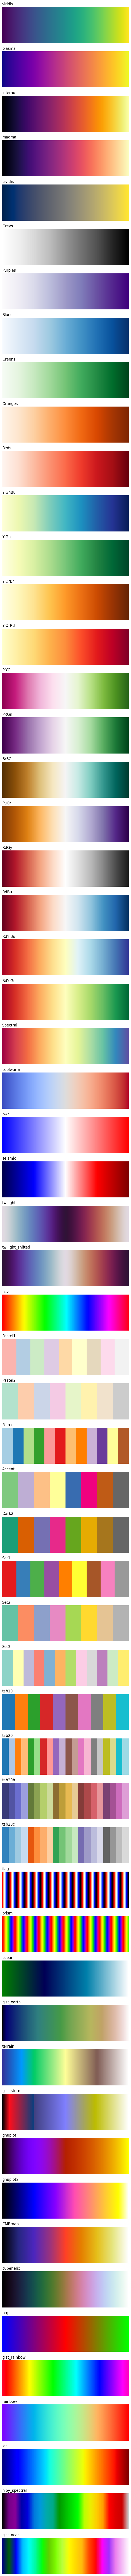

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de colormaps a visualizar
colormaps = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlGnBu', 'YlGn', 'YlOrBr', 'YlOrRd',
    'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
    'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
    'twilight', 'twilight_shifted', 'hsv',
    'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c',
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
    'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'
]

# Crear un gradiente de colores
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Crear una figura grande para contener todos los colormaps
fig, axes = plt.subplots(nrows=len(colormaps), figsize=(6, 2*len(colormaps)))

# Mostrar cada colormap en su propia fila
for ax, cmap in zip(axes, colormaps):
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.set_axis_off()
    ax.set_title(cmap, loc='left')

# Ajustar la disposición de la figura
plt.tight_layout()
plt.show()
